In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.backend import clear_session
from tensorflow.keras import backend as K
import scikitplot as skplt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
layers_1_s = lambda: [
    Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
]

layers_2_s = lambda: [
    Conv2D(4, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

layers_5_s = lambda: [
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(6, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

layers_10_s = lambda: [
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    Conv2D(4, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
]

In [4]:
layers_1_l = lambda: [
    Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_2_l = lambda: [
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_5_l = lambda: [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

layers_10_l = lambda: [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(12, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

In [5]:
cnns = {
    'CNN 1 S': layers_1_s,
    'CNN 2 S': layers_2_s,
    'CNN 5 S': layers_5_s,
    'CNN 10 S': layers_10_s,
    'CNN 1 L': layers_1_l,
    'CNN 2 L': layers_2_l,
    'CNN 5 L': layers_5_l,
    'CNN 10 L': layers_10_l,
}

In [6]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = fashion_mnist.load_data()

X_train_org = X_train_org.reshape(-1, 28, 28, 1)
X_test_org = X_test_org.reshape(-1, 28, 28, 1)

X_train_org = X_train_org.astype('float32')
X_test_org = X_test_org.astype('float32')
X_train_org /= 255
X_test_org /= 255

X_train_org, y_train_org = resample(X_train_org, y_train_org, random_state=0)
X_test_org, y_test_org = resample(X_test_org, y_test_org, random_state=0)

In [7]:
def get_train_test_data(train_samples, test_samples):
    X_train = X_train_org[:train_samples]
    y_train = y_train_org[:train_samples]
    X_test = X_test_org[:test_samples]
    y_test = y_test_org[:test_samples]
    return X_train, y_train, X_test, y_test

In [8]:
def calc_train_test_samples(total_samples, ratio):
    train_samples = int(total_samples * ratio)
    test_samples = total_samples - train_samples
    return train_samples, test_samples

In [9]:
def plot_roc(y_test, y_pred):
    ax = skplt.metrics.plot_roc(y_test, y_pred, figsize=(8, 5))
    ax.set(xlim=(-0.04, 1.04), ylim=(-0.04, 1.04))
    return ax.figure

In [10]:
def plot_cm(y_test, y_pred):
    ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred.argmax(axis=1), normalize=True, figsize=(7, 7))
    return ax.figure

In [11]:
def plot_pr(y_test, y_pred):
    ax = skplt.metrics.plot_precision_recall(y_test, y_pred, figsize=(8, 6))
    return ax.figure

In [12]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_m(y_true, y_pred):  
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
def evaluate_svm(train_samples, test_samples):
    X_train, y_train, X_test, y_test = get_train_test_data(train_samples, test_samples)
    
    X_train = X_train.reshape(-1, 784)
    X_test = X_test.reshape(-1, 784)
    
    svc = SVC(C=5.0, kernel='rbf', probability=True)
    svc.fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    y_pred_proba = svc.predict_proba(X_test)
    
    accuracy = cross_val_score(svc, X_train, y_train, cv=5).mean()
    val_accuracy = accuracy_score(y_test, y_pred)
    
    roc = plot_roc(y_test, y_pred_proba)
    pr = plot_pr(y_test, y_pred_proba)
    cm = plot_cm(y_test, y_pred_proba)
    
    return accuracy, val_accuracy, roc, pr, cm

In [14]:
def evaluate_cnn(layers, train_samples, test_samples, epochs):
    X_train, y_train, X_test, y_test = get_train_test_data(train_samples, test_samples)    
    
    clear_session()
    np.random.seed(0x859)
    tf.random.set_seed(0x859)
    
    model = Sequential(layers())
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', f1_m])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=True)
    
    loss = history.history['loss'][-1]
    accuracy = history.history['accuracy'][-1]
    f1 = history.history['f1_m'][-1]
    
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    val_f1 = history.history['val_f1_m'][-1]
       
    y_pred_proba = model.predict(X_test, verbose=False)
    
    roc = plot_roc(y_test, y_pred_proba)
    pr = plot_pr(y_test, y_pred_proba)
    cm = plot_cm(y_test, y_pred_proba)
    
    return loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm

In [15]:
def select_size(results_df, size):
    return results_df[results_df['model'].str.endswith(size)]

In [16]:
def plot_3a(data):
    ax = sns.lmplot(x='ratio', y='val_accuracy', hue='model', data=data)
    ax.set(xlim=(0.08, 0.92))
    return ax

In [17]:
def plot_3b(data):
    ax = sns.lmplot(x='epochs', y='val_accuracy', hue='model', data=data)
    return ax

# 3a

In [18]:
def gen_3a_svm():
    total_samples = 10000
    ratios = np.arange(0.025, 1.0, 0.025)
    
#     total_samples = 300
#     ratios = [0.2, 0.8]
    
    for ratio in ratios:
        train_samples, test_samples = calc_train_test_samples(total_samples, ratio)               
        accuracy, val_accuracy, roc, pr, cm = evaluate_svm(train_samples, test_samples)
        
        yield 'SVM', train_samples, test_samples, ratio, accuracy, val_accuracy        
        roc.savefig(f'plots/3a/svm_{ratio}_roc.svg')
        pr.savefig(f'plots/3a/svm_{ratio}_pr.svg')
        cm.savefig(f'plots/3a/svm_{ratio}_cm.svg')          
        plt.close('all')
        
        
# results_3a_svm = pd.DataFrame(gen_3a_svm(), columns=[
#     'model', 'train_samples', 'test_samples', 'ratio', 'accuracy', 'val_accuracy'
# ])
# results_3a_svm.to_csv('results/3a_svm.csv')
# results_3a_svm

results_3a_svm = pd.read_csv('results/3a_svm.csv')

,model,train_samples,test_samples,ratio,accuracy,val_accuracy
0,SVM,250,9750,0.025,0.856000,0.855179
1,SVM,500,9500,0.050,0.888000,0.909053
2,SVM,750,9250,0.075,0.892000,0.919568
3,SVM,1000,9000,0.100,0.915000,0.927222
4,SVM,1250,8750,0.125,0.920800,0.929143
5,SVM,1500,8500,0.150,0.926667,0.933176
6,SVM,1750,8250,0.175,0.931429,0.937091
7,SVM,2000,8000,0.200,0.936000,0.938250
8,SVM,2250,7750,0.225,0.938667,0.943097
9,SVM,2500,7500,0.250,0.940800,0.942400


In [19]:
def gen_3a_cnn():
    total_samples = 20000
    epochs = 10
    ratios = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    
#     total_samples = 300
#     epochs = 1
#     ratios = [0.2, 0.8]
    
    for ratio in ratios:
        train_samples, test_samples = calc_train_test_samples(total_samples, ratio)
        
        for name, layers in cnns.items():   
            loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm = evaluate_cnn(layers, train_samples, test_samples, epochs)
            
            yield name, train_samples, test_samples, ratio, loss, accuracy, f1, val_loss, val_accuracy, val_f1
            
            codename = name.lower().replace(' ', '_')
            roc.savefig(f'plots/3a/{codename}_r{ratio}_roc.svg')
            pr.savefig(f'plots/3a/{codename}_r{ratio}_pr.svg')
            cm.savefig(f'plots/3a/{codename}_r{ratio}_cm.svg')             
            plt.close('all')
            
results_3a_cnn = pd.DataFrame(gen_3a_cnn(), columns=[    
    'model',
    'train_samples', 'test_samples', 'ratio',
    'loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'
])
results_3a_cnn.to_csv('results/3a_cnn.csv')
results_3a_cnn

Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 3s 6ms/sample - loss: 2.1964 - accuracy: 0.2460 - f1_m: 9.2453 - val_loss: 2.0218 - val_accuracy: 0.4172 - val_f1_m: 8.6711
Epoch 2/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.8281 - accuracy: 0.4860 - f1_m: 7.9242 - val_loss: 1.6493 - val_accuracy: 0.5711 - val_f1_m: 7.1644
Epoch 3/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.4412 - accuracy: 0.6500 - f1_m: 6.1857 - val_loss: 1.3189 - val_accuracy: 0.6664 - val_f1_m: 5.2533
Epoch 4/10
500/500 [==============================] - 1s 1ms/sample - loss: 1.1155 - accuracy: 0.7340 - f1_m: 4.4257 - val_loss: 1.0564 - val_accuracy: 0.7389 - val_f1_m: 4.0718
Epoch 5/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.8929 - accuracy: 0.7720 - f1_m: 3.1678 - val_loss: 0.9061 - val_accuracy: 0.7587 - val_f1_m: 3.1577
Epoch 6/10
500/500 [==============================] - 1s 1ms/s

Epoch 6/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.3872 - accuracy: 0.8920 - f1_m: 1.6907 - val_loss: 0.4901 - val_accuracy: 0.8636 - val_f1_m: 1.7346
Epoch 7/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.3304 - accuracy: 0.8980 - f1_m: 1.5686 - val_loss: 0.4536 - val_accuracy: 0.8741 - val_f1_m: 1.6352
Epoch 8/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.2848 - accuracy: 0.9260 - f1_m: 1.5017 - val_loss: 0.4422 - val_accuracy: 0.8688 - val_f1_m: 1.5868
Epoch 9/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.2464 - accuracy: 0.9320 - f1_m: 1.4383 - val_loss: 0.4291 - val_accuracy: 0.8762 - val_f1_m: 1.4983
Epoch 10/10
500/500 [==============================] - 1s 1ms/sample - loss: 0.2106 - accuracy: 0.9580 - f1_m: 1.3784 - val_loss: 0.4344 - val_accuracy: 0.8742 - val_f1_m: 1.4830
Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 1s 3ms/

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4073 - accuracy: 0.8660 - f1_m: 1.5968 - val_loss: 0.4347 - val_accuracy: 0.8720 - val_f1_m: 1.5490
Epoch 2/10
1000/1000 [==============================] - 1s 698us/sample - loss: 0.3361 - accuracy: 0.8910 - f1_m: 1.4725 - val_loss: 0.3962 - val_accuracy: 0.8835 - val_f1_m: 1.4547
Epoch 3/10
1000/1000 [==============================] - 1s 713us/sample - loss: 0.3005 - accuracy: 0.9150 - f1_m: 1.4050 - val_loss: 0.3625 - val_accuracy: 0.8968 - val_f1_m: 1.3896
Epoch 4/10
1000/1000 [==============================] - 1s 690us/sample - loss: 0.2690 - accuracy: 0.9210 - f1_m: 1.3416 - val_loss: 0.3685 - val_accuracy: 0.8892 - val_f1_m: 1.3718
Epoch 5/10
1000/1000 [==============================] - 1s 702us/sample - loss: 0.2504 - accuracy: 0.9320 - f1_m: 1.3327 - val_loss: 0.3569 - val_accuracy: 0.8984 - val_f1_m: 1.3180
Epoch 6/10
1000/1000 [=====================

Epoch 5/10
1000/1000 [==============================] - 1s 752us/sample - loss: 0.0969 - accuracy: 0.9700 - f1_m: 1.1057 - val_loss: 0.2532 - val_accuracy: 0.9330 - val_f1_m: 1.1340
Epoch 6/10
1000/1000 [==============================] - 1s 742us/sample - loss: 0.0616 - accuracy: 0.9860 - f1_m: 1.0595 - val_loss: 0.2955 - val_accuracy: 0.9220 - val_f1_m: 1.1179
Epoch 7/10
1000/1000 [==============================] - 1s 709us/sample - loss: 0.0489 - accuracy: 0.9870 - f1_m: 1.0382 - val_loss: 0.2449 - val_accuracy: 0.9372 - val_f1_m: 1.0843
Epoch 8/10
1000/1000 [==============================] - 1s 717us/sample - loss: 0.0338 - accuracy: 0.9920 - f1_m: 1.0211 - val_loss: 0.2465 - val_accuracy: 0.9380 - val_f1_m: 1.0724
Epoch 9/10
1000/1000 [==============================] - 1s 728us/sample - loss: 0.0287 - accuracy: 0.9910 - f1_m: 1.0101 - val_loss: 0.3109 - val_accuracy: 0.9218 - val_f1_m: 1.1142
Epoch 10/10
1000/1000 [==============================] - 1s 767us/sample - loss: 0.0630 - 

Epoch 9/10
1500/1500 [==============================] - 1s 521us/sample - loss: 0.0730 - accuracy: 0.9767 - f1_m: 1.0833 - val_loss: 0.2695 - val_accuracy: 0.9268 - val_f1_m: 1.1372
Epoch 10/10
1500/1500 [==============================] - 1s 519us/sample - loss: 0.0618 - accuracy: 0.9827 - f1_m: 1.0678 - val_loss: 0.2737 - val_accuracy: 0.9262 - val_f1_m: 1.1211
Train on 1500 samples, validate on 10000 samples
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/sample - loss: 0.1839 - accuracy: 0.9427 - f1_m: 1.1560 - val_loss: 0.2850 - val_accuracy: 0.9149 - val_f1_m: 1.1370
Epoch 2/10
1500/1500 [==============================] - 1s 577us/sample - loss: 0.1461 - accuracy: 0.9553 - f1_m: 1.1375 - val_loss: 0.2820 - val_accuracy: 0.9293 - val_f1_m: 1.1278
Epoch 3/10
1500/1500 [==============================] - 1s 575us/sample - loss: 0.1061 - accuracy: 0.9673 - f1_m: 1.0986 - val_loss: 0.3047 - val_accuracy: 0.9237 - val_f1_m: 1.0944
Epoch 4/10
1500/1500 [====================

Epoch 3/10
1500/1500 [==============================] - 1s 569us/sample - loss: 0.0221 - accuracy: 0.9960 - f1_m: 0.9797 - val_loss: 0.2313 - val_accuracy: 0.9480 - val_f1_m: 1.0300
Epoch 4/10
1500/1500 [==============================] - 1s 565us/sample - loss: 0.0205 - accuracy: 0.9933 - f1_m: 0.9907 - val_loss: 0.2725 - val_accuracy: 0.9443 - val_f1_m: 1.0133
Epoch 5/10
1500/1500 [==============================] - 1s 583us/sample - loss: 0.0236 - accuracy: 0.9920 - f1_m: 0.9785 - val_loss: 0.3199 - val_accuracy: 0.9396 - val_f1_m: 1.0226
Epoch 6/10
1500/1500 [==============================] - 1s 587us/sample - loss: 0.0319 - accuracy: 0.9927 - f1_m: 0.9806 - val_loss: 0.2613 - val_accuracy: 0.9400 - val_f1_m: 1.0339
Epoch 7/10
1500/1500 [==============================] - 1s 607us/sample - loss: 0.0580 - accuracy: 0.9827 - f1_m: 1.0017 - val_loss: 0.1871 - val_accuracy: 0.9555 - val_f1_m: 1.0267
Epoch 8/10
1500/1500 [==============================] - 1s 627us/sample - loss: 0.0206 - a

Epoch 7/10
2000/2000 [==============================] - 1s 461us/sample - loss: 0.0367 - accuracy: 0.9860 - f1_m: 0.9953 - val_loss: 0.2499 - val_accuracy: 0.9457 - val_f1_m: 1.0260
Epoch 8/10
2000/2000 [==============================] - 1s 469us/sample - loss: 0.0153 - accuracy: 0.9955 - f1_m: 0.9821 - val_loss: 0.2861 - val_accuracy: 0.9479 - val_f1_m: 1.0169
Epoch 9/10
2000/2000 [==============================] - 1s 453us/sample - loss: 0.0079 - accuracy: 0.9985 - f1_m: 0.9605 - val_loss: 0.3094 - val_accuracy: 0.9439 - val_f1_m: 1.0059
Epoch 10/10
2000/2000 [==============================] - 1s 450us/sample - loss: 0.0373 - accuracy: 0.9875 - f1_m: 0.9861 - val_loss: 0.2914 - val_accuracy: 0.9413 - val_f1_m: 1.0221
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 982us/sample - loss: 0.1530 - accuracy: 0.9575 - f1_m: 1.0675 - val_loss: 0.2420 - val_accuracy: 0.9392 - val_f1_m: 1.0818
Epoch 2/10
2000/2000 [==================

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1006 - accuracy: 0.9750 - f1_m: 1.0299 - val_loss: 0.2191 - val_accuracy: 0.9412 - val_f1_m: 1.0446
Epoch 2/10
2000/2000 [==============================] - 1s 606us/sample - loss: 0.0455 - accuracy: 0.9860 - f1_m: 0.9883 - val_loss: 0.2068 - val_accuracy: 0.9412 - val_f1_m: 1.0473
Epoch 3/10
2000/2000 [==============================] - 1s 575us/sample - loss: 0.0184 - accuracy: 0.9940 - f1_m: 0.9745 - val_loss: 0.2833 - val_accuracy: 0.9369 - val_f1_m: 1.0268
Epoch 4/10
2000/2000 [==============================] - 1s 583us/sample - loss: 0.0268 - accuracy: 0.9920 - f1_m: 0.9725 - val_loss: 0.2955 - val_accuracy: 0.9332 - val_f1_m: 1.0299
Epoch 5/10
2000/2000 [==============================] - 1s 600us/sample - loss: 0.0259 - accuracy: 0.9900 - f1_m: 0.9745 - val_loss: 0.2445 - val_accuracy: 0.9458 - val_f1_m: 1.0182
Epoch 6/10
2000/2000 [=====================

Epoch 5/10
2500/2500 [==============================] - 1s 440us/sample - loss: 0.0384 - accuracy: 0.9900 - f1_m: 0.9854 - val_loss: 0.2719 - val_accuracy: 0.9345 - val_f1_m: 1.0320
Epoch 6/10
2500/2500 [==============================] - 1s 438us/sample - loss: 0.0913 - accuracy: 0.9724 - f1_m: 1.0424 - val_loss: 0.2316 - val_accuracy: 0.9446 - val_f1_m: 1.0378
Epoch 7/10
2500/2500 [==============================] - 1s 446us/sample - loss: 0.0280 - accuracy: 0.9920 - f1_m: 0.9842 - val_loss: 0.2427 - val_accuracy: 0.9503 - val_f1_m: 1.0127
Epoch 8/10
2500/2500 [==============================] - 1s 454us/sample - loss: 0.0240 - accuracy: 0.9928 - f1_m: 0.9786 - val_loss: 0.2882 - val_accuracy: 0.9432 - val_f1_m: 1.0141
Epoch 9/10
2500/2500 [==============================] - 1s 454us/sample - loss: 0.0098 - accuracy: 0.9968 - f1_m: 0.9660 - val_loss: 0.3137 - val_accuracy: 0.9477 - val_f1_m: 1.0000
Epoch 10/10
2500/2500 [==============================] - 1s 440us/sample - loss: 0.0122 - 

Epoch 9/10
2500/2500 [==============================] - 1s 477us/sample - loss: 0.0178 - accuracy: 0.9948 - f1_m: 0.9645 - val_loss: 0.2057 - val_accuracy: 0.9622 - val_f1_m: 0.9908
Epoch 10/10
2500/2500 [==============================] - 1s 480us/sample - loss: 0.0028 - accuracy: 0.9992 - f1_m: 0.9515 - val_loss: 0.2720 - val_accuracy: 0.9607 - val_f1_m: 0.9771
Train on 3000 samples, validate on 10000 samples
Epoch 1/10
3000/3000 [==============================] - 2s 531us/sample - loss: 0.1702 - accuracy: 0.9497 - f1_m: 1.1211 - val_loss: 0.4273 - val_accuracy: 0.8883 - val_f1_m: 1.1479
Epoch 2/10
3000/3000 [==============================] - 1s 282us/sample - loss: 0.1573 - accuracy: 0.9523 - f1_m: 1.1173 - val_loss: 0.4239 - val_accuracy: 0.8916 - val_f1_m: 1.1460
Epoch 3/10
3000/3000 [==============================] - 1s 276us/sample - loss: 0.1458 - accuracy: 0.9583 - f1_m: 1.1187 - val_loss: 0.4445 - val_accuracy: 0.8848 - val_f1_m: 1.1832
Epoch 4/10
3000/3000 [==================

Epoch 6/10
3500/3500 [==============================] - 1s 260us/sample - loss: 0.1153 - accuracy: 0.9629 - f1_m: 1.1105 - val_loss: 0.3671 - val_accuracy: 0.9056 - val_f1_m: 1.1219
Epoch 7/10
3500/3500 [==============================] - 1s 258us/sample - loss: 0.0992 - accuracy: 0.9697 - f1_m: 1.0856 - val_loss: 0.3647 - val_accuracy: 0.9069 - val_f1_m: 1.1211
Epoch 8/10
3500/3500 [==============================] - 1s 259us/sample - loss: 0.0981 - accuracy: 0.9737 - f1_m: 1.0963 - val_loss: 0.3666 - val_accuracy: 0.9122 - val_f1_m: 1.1108
Epoch 9/10
3500/3500 [==============================] - 1s 249us/sample - loss: 0.0938 - accuracy: 0.9729 - f1_m: 1.0791 - val_loss: 0.3791 - val_accuracy: 0.9066 - val_f1_m: 1.1139
Epoch 10/10
3500/3500 [==============================] - 1s 240us/sample - loss: 0.0840 - accuracy: 0.9766 - f1_m: 1.0774 - val_loss: 0.3711 - val_accuracy: 0.9081 - val_f1_m: 1.1086
Train on 3500 samples, validate on 10000 samples
Epoch 1/10
3500/3500 [==================

Epoch 10/10
3500/3500 [==============================] - 1s 246us/sample - loss: 0.0037 - accuracy: 1.0000 - f1_m: 0.9530 - val_loss: 0.3425 - val_accuracy: 0.9377 - val_f1_m: 1.0167
Train on 3500 samples, validate on 10000 samples
Epoch 1/10
3500/3500 [==============================] - 2s 448us/sample - loss: 0.0453 - accuracy: 0.9897 - f1_m: 0.9712 - val_loss: 0.1600 - val_accuracy: 0.9605 - val_f1_m: 1.0071
Epoch 2/10
3500/3500 [==============================] - 1s 272us/sample - loss: 0.0159 - accuracy: 0.9957 - f1_m: 0.9662 - val_loss: 0.1501 - val_accuracy: 0.9689 - val_f1_m: 0.9928
Epoch 3/10
3500/3500 [==============================] - 1s 268us/sample - loss: 0.0074 - accuracy: 0.9983 - f1_m: 0.9551 - val_loss: 0.2037 - val_accuracy: 0.9580 - val_f1_m: 1.0047
Epoch 4/10
3500/3500 [==============================] - 1s 271us/sample - loss: 0.0198 - accuracy: 0.9931 - f1_m: 0.9712 - val_loss: 0.1514 - val_accuracy: 0.9668 - val_f1_m: 0.9924
Epoch 5/10
3500/3500 [==================

Epoch 7/10
4000/4000 [==============================] - 1s 239us/sample - loss: 1.1596e-04 - accuracy: 1.0000 - f1_m: 0.9430 - val_loss: 0.1503 - val_accuracy: 0.9741 - val_f1_m: 0.9721
Epoch 8/10
4000/4000 [==============================] - 1s 241us/sample - loss: 9.7287e-05 - accuracy: 1.0000 - f1_m: 0.9432 - val_loss: 0.1520 - val_accuracy: 0.9749 - val_f1_m: 0.9717
Epoch 9/10
4000/4000 [==============================] - 1s 238us/sample - loss: 8.3627e-05 - accuracy: 1.0000 - f1_m: 0.9431 - val_loss: 0.1539 - val_accuracy: 0.9748 - val_f1_m: 0.9718
Epoch 10/10
4000/4000 [==============================] - 1s 233us/sample - loss: 7.1689e-05 - accuracy: 1.0000 - f1_m: 0.9431 - val_loss: 0.1549 - val_accuracy: 0.9747 - val_f1_m: 0.9717
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 437us/sample - loss: 0.0313 - accuracy: 0.9910 - f1_m: 0.9545 - val_loss: 0.1571 - val_accuracy: 0.9684 - val_f1_m: 0.9817
Epoch 2/10
4000/4000 [==

4500/4500 [==============================] - 1s 270us/sample - loss: 0.0184 - accuracy: 0.9942 - f1_m: 0.9562 - val_loss: 0.1141 - val_accuracy: 0.9728 - val_f1_m: 0.9912
Epoch 4/10
4500/4500 [==============================] - 1s 269us/sample - loss: 0.0032 - accuracy: 0.9998 - f1_m: 0.9483 - val_loss: 0.1313 - val_accuracy: 0.9753 - val_f1_m: 0.9773
Epoch 5/10
4500/4500 [==============================] - 1s 274us/sample - loss: 0.0029 - accuracy: 0.9993 - f1_m: 0.9471 - val_loss: 0.1314 - val_accuracy: 0.9751 - val_f1_m: 0.9739
Epoch 6/10
4500/4500 [==============================] - 1s 270us/sample - loss: 2.5847e-04 - accuracy: 1.0000 - f1_m: 0.9429 - val_loss: 0.1265 - val_accuracy: 0.9795 - val_f1_m: 0.9702
Epoch 7/10
4500/4500 [==============================] - 1s 271us/sample - loss: 0.0280 - accuracy: 0.9913 - f1_m: 0.9577 - val_loss: 0.1133 - val_accuracy: 0.9712 - val_f1_m: 0.9888
Epoch 8/10
4500/4500 [==============================] - 1s 271us/sample - loss: 0.0078 - accuracy

Epoch 7/10
5000/5000 [==============================] - 1s 247us/sample - loss: 0.0040 - accuracy: 0.9986 - f1_m: 0.9487 - val_loss: 0.2021 - val_accuracy: 0.9646 - val_f1_m: 0.9798
Epoch 8/10
5000/5000 [==============================] - 1s 243us/sample - loss: 0.0013 - accuracy: 1.0000 - f1_m: 0.9464 - val_loss: 0.1786 - val_accuracy: 0.9686 - val_f1_m: 0.9744
Epoch 9/10
5000/5000 [==============================] - 1s 244us/sample - loss: 2.1464e-04 - accuracy: 1.0000 - f1_m: 0.9439 - val_loss: 0.1814 - val_accuracy: 0.9700 - val_f1_m: 0.9735
Epoch 10/10
5000/5000 [==============================] - 1s 266us/sample - loss: 1.3276e-04 - accuracy: 1.0000 - f1_m: 0.9435 - val_loss: 0.1845 - val_accuracy: 0.9704 - val_f1_m: 0.9723
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 479us/sample - loss: 0.0383 - accuracy: 0.9894 - f1_m: 0.9704 - val_loss: 0.1583 - val_accuracy: 0.9625 - val_f1_m: 1.0012
Epoch 2/10
5000/5000 [==========

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 492us/sample - loss: 0.0214 - accuracy: 0.9942 - f1_m: 0.9583 - val_loss: 0.1132 - val_accuracy: 0.9708 - val_f1_m: 0.9929
Epoch 2/10
5000/5000 [==============================] - 2s 315us/sample - loss: 0.0167 - accuracy: 0.9956 - f1_m: 0.9554 - val_loss: 0.1172 - val_accuracy: 0.9725 - val_f1_m: 0.9857
Epoch 3/10
5000/5000 [==============================] - 2s 318us/sample - loss: 0.0072 - accuracy: 0.9976 - f1_m: 0.9504 - val_loss: 0.1484 - val_accuracy: 0.9684 - val_f1_m: 0.9800
Epoch 4/10
5000/5000 [==============================] - 2s 320us/sample - loss: 0.0075 - accuracy: 0.9974 - f1_m: 0.9495 - val_loss: 0.1451 - val_accuracy: 0.9723 - val_f1_m: 0.9772
Epoch 5/10
5000/5000 [==============================] - 2s 319us/sample - loss: 0.0117 - accuracy: 0.9964 - f1_m: 0.9515 - val_loss: 0.1517 - val_accuracy: 0.9676 - val_f1_m: 1.0003
Epoch 6/10
5000/5000 [===================

5500/5500 [==============================] - 2s 311us/sample - loss: 5.8023e-06 - accuracy: 1.0000 - f1_m: 0.9447 - val_loss: 0.1411 - val_accuracy: 0.9787 - val_f1_m: 0.9641
Epoch 8/10
5500/5500 [==============================] - 2s 308us/sample - loss: 4.5196e-06 - accuracy: 1.0000 - f1_m: 0.9444 - val_loss: 0.1426 - val_accuracy: 0.9788 - val_f1_m: 0.9637
Epoch 9/10
5500/5500 [==============================] - 2s 306us/sample - loss: 3.5532e-06 - accuracy: 1.0000 - f1_m: 0.9445 - val_loss: 0.1443 - val_accuracy: 0.9785 - val_f1_m: 0.9633
Epoch 10/10
5500/5500 [==============================] - 2s 309us/sample - loss: 2.7778e-06 - accuracy: 1.0000 - f1_m: 0.9446 - val_loss: 0.1454 - val_accuracy: 0.9784 - val_f1_m: 0.9632
Train on 6000 samples, validate on 10000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 260us/sample - loss: 0.0525 - accuracy: 0.9865 - f1_m: 1.0106 - val_loss: 0.3483 - val_accuracy: 0.9294 - val_f1_m: 1.0426
Epoch 2/10
6000/6000 [=============

Train on 6000 samples, validate on 10000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 261us/sample - loss: 0.0367 - accuracy: 0.9917 - f1_m: 0.9656 - val_loss: 0.3132 - val_accuracy: 0.9483 - val_f1_m: 0.9985
Epoch 2/10
6000/6000 [==============================] - 1s 174us/sample - loss: 0.0170 - accuracy: 0.9955 - f1_m: 0.9606 - val_loss: 0.3086 - val_accuracy: 0.9452 - val_f1_m: 0.9995
Epoch 3/10
6000/6000 [==============================] - 1s 174us/sample - loss: 0.0085 - accuracy: 0.9972 - f1_m: 0.9588 - val_loss: 0.3051 - val_accuracy: 0.9490 - val_f1_m: 0.9982
Epoch 4/10
6000/6000 [==============================] - 1s 175us/sample - loss: 0.0068 - accuracy: 0.9982 - f1_m: 0.9569 - val_loss: 0.2949 - val_accuracy: 0.9507 - val_f1_m: 0.9985
Epoch 5/10
6000/6000 [==============================] - 1s 176us/sample - loss: 0.0027 - accuracy: 0.9992 - f1_m: 0.9487 - val_loss: 0.3081 - val_accuracy: 0.9519 - val_f1_m: 0.9974
Epoch 6/10
6000/6000 [===================

Epoch 8/10
6500/6500 [==============================] - 1s 168us/sample - loss: 0.0164 - accuracy: 0.9952 - f1_m: 0.9609 - val_loss: 0.3390 - val_accuracy: 0.9416 - val_f1_m: 1.0044
Epoch 9/10
6500/6500 [==============================] - 1s 168us/sample - loss: 0.0075 - accuracy: 0.9978 - f1_m: 0.9559 - val_loss: 0.3299 - val_accuracy: 0.9476 - val_f1_m: 0.9972
Epoch 10/10
6500/6500 [==============================] - 1s 168us/sample - loss: 0.0121 - accuracy: 0.9957 - f1_m: 0.9580 - val_loss: 0.3336 - val_accuracy: 0.9516 - val_f1_m: 0.9960
Train on 6500 samples, validate on 10000 samples
Epoch 1/10
6500/6500 [==============================] - 2s 275us/sample - loss: 0.0199 - accuracy: 0.9943 - f1_m: 0.9544 - val_loss: 0.1211 - val_accuracy: 0.9737 - val_f1_m: 0.9801
Epoch 2/10
6500/6500 [==============================] - 1s 188us/sample - loss: 0.0035 - accuracy: 0.9992 - f1_m: 0.9491 - val_loss: 0.1209 - val_accuracy: 0.9764 - val_f1_m: 0.9732
Epoch 3/10
6500/6500 [==================

Epoch 5/10
7000/7000 [==============================] - 1s 180us/sample - loss: 7.3050e-05 - accuracy: 1.0000 - f1_m: 0.9442 - val_loss: 0.1259 - val_accuracy: 0.9778 - val_f1_m: 0.9651
Epoch 6/10
7000/7000 [==============================] - 1s 179us/sample - loss: 4.9024e-05 - accuracy: 1.0000 - f1_m: 0.9441 - val_loss: 0.1260 - val_accuracy: 0.9783 - val_f1_m: 0.9650
Epoch 7/10
7000/7000 [==============================] - 1s 180us/sample - loss: 3.7801e-05 - accuracy: 1.0000 - f1_m: 0.9443 - val_loss: 0.1277 - val_accuracy: 0.9784 - val_f1_m: 0.9647
Epoch 8/10
7000/7000 [==============================] - 1s 181us/sample - loss: 3.1084e-05 - accuracy: 1.0000 - f1_m: 0.9442 - val_loss: 0.1287 - val_accuracy: 0.9782 - val_f1_m: 0.9643
Epoch 9/10
7000/7000 [==============================] - 1s 181us/sample - loss: 2.5831e-05 - accuracy: 1.0000 - f1_m: 0.9442 - val_loss: 0.1295 - val_accuracy: 0.9783 - val_f1_m: 0.9642
Epoch 10/10
7000/7000 [==============================] - 1s 177us/samp

7500/7500 [==============================] - 2s 291us/sample - loss: 0.0152 - accuracy: 0.9968 - f1_m: 0.9501 - val_loss: 0.1007 - val_accuracy: 0.9803 - val_f1_m: 0.9728
Epoch 2/10
7500/7500 [==============================] - 2s 205us/sample - loss: 0.0026 - accuracy: 0.9993 - f1_m: 0.9473 - val_loss: 0.1101 - val_accuracy: 0.9808 - val_f1_m: 0.9714
Epoch 3/10
7500/7500 [==============================] - 2s 207us/sample - loss: 0.0029 - accuracy: 0.9997 - f1_m: 0.9451 - val_loss: 0.1061 - val_accuracy: 0.9812 - val_f1_m: 0.9698
Epoch 4/10
7500/7500 [==============================] - 2s 206us/sample - loss: 0.0020 - accuracy: 0.9995 - f1_m: 0.9465 - val_loss: 0.1220 - val_accuracy: 0.9819 - val_f1_m: 0.9674
Epoch 5/10
7500/7500 [==============================] - 2s 205us/sample - loss: 9.1649e-05 - accuracy: 1.0000 - f1_m: 0.9450 - val_loss: 0.1249 - val_accuracy: 0.9820 - val_f1_m: 0.9640
Epoch 6/10
7500/7500 [==============================] - 2s 205us/sample - loss: 2.2793e-05 - accu

8000/8000 [==============================] - 2s 204us/sample - loss: 1.1682e-05 - accuracy: 1.0000 - f1_m: 0.9451 - val_loss: 0.1242 - val_accuracy: 0.9819 - val_f1_m: 0.9643
Epoch 8/10
8000/8000 [==============================] - 2s 199us/sample - loss: 9.0368e-06 - accuracy: 1.0000 - f1_m: 0.9454 - val_loss: 0.1264 - val_accuracy: 0.9819 - val_f1_m: 0.9634
Epoch 9/10
8000/8000 [==============================] - 2s 200us/sample - loss: 7.1761e-06 - accuracy: 1.0000 - f1_m: 0.9452 - val_loss: 0.1283 - val_accuracy: 0.9819 - val_f1_m: 0.9636
Epoch 10/10
8000/8000 [==============================] - 2s 201us/sample - loss: 5.7994e-06 - accuracy: 1.0000 - f1_m: 0.9453 - val_loss: 0.1300 - val_accuracy: 0.9819 - val_f1_m: 0.9621
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 374us/sample - loss: 0.0168 - accuracy: 0.9967 - f1_m: 0.9523 - val_loss: 0.1415 - val_accuracy: 0.9761 - val_f1_m: 0.9682
Epoch 2/10
8000/8000 [=============

Train on 8500 samples, validate on 10000 samples
Epoch 1/10
8500/8500 [==============================] - 3s 337us/sample - loss: 0.0149 - accuracy: 0.9964 - f1_m: 0.9548 - val_loss: 0.1786 - val_accuracy: 0.9685 - val_f1_m: 0.9732
Epoch 2/10
8500/8500 [==============================] - 2s 235us/sample - loss: 0.0137 - accuracy: 0.9955 - f1_m: 0.9553 - val_loss: 0.2025 - val_accuracy: 0.9655 - val_f1_m: 0.9839
Epoch 3/10
8500/8500 [==============================] - 2s 235us/sample - loss: 0.0111 - accuracy: 0.9973 - f1_m: 0.9536 - val_loss: 0.1830 - val_accuracy: 0.9720 - val_f1_m: 0.9677
Epoch 4/10
8500/8500 [==============================] - 2s 234us/sample - loss: 0.0071 - accuracy: 0.9980 - f1_m: 0.9516 - val_loss: 0.1577 - val_accuracy: 0.9758 - val_f1_m: 0.9671
Epoch 5/10
8500/8500 [==============================] - 2s 236us/sample - loss: 0.0098 - accuracy: 0.9978 - f1_m: 0.9508 - val_loss: 0.1460 - val_accuracy: 0.9707 - val_f1_m: 0.9769
Epoch 6/10
8500/8500 [===================

Epoch 8/10
9000/9000 [==============================] - 2s 238us/sample - loss: 3.8607e-05 - accuracy: 1.0000 - f1_m: 0.9475 - val_loss: 0.1592 - val_accuracy: 0.9798 - val_f1_m: 0.9627
Epoch 9/10
9000/9000 [==============================] - 2s 246us/sample - loss: 2.3559e-05 - accuracy: 1.0000 - f1_m: 0.9473 - val_loss: 0.1615 - val_accuracy: 0.9795 - val_f1_m: 0.9629
Epoch 10/10
9000/9000 [==============================] - 2s 245us/sample - loss: 1.7508e-05 - accuracy: 1.0000 - f1_m: 0.9478 - val_loss: 0.1639 - val_accuracy: 0.9795 - val_f1_m: 0.9625
Train on 9000 samples, validate on 10000 samples
Epoch 1/10
9000/9000 [==============================] - 2s 202us/sample - loss: 0.0192 - accuracy: 0.9950 - f1_m: 0.9584 - val_loss: 0.2365 - val_accuracy: 0.9586 - val_f1_m: 0.9889
Epoch 2/10
9000/9000 [==============================] - 1s 144us/sample - loss: 0.0061 - accuracy: 0.9983 - f1_m: 0.9539 - val_loss: 0.2683 - val_accuracy: 0.9575 - val_f1_m: 0.9845
Epoch 3/10
9000/9000 [======

Epoch 5/10
9500/9500 [==============================] - 1s 138us/sample - loss: 6.2070e-04 - accuracy: 0.9999 - f1_m: 0.9483 - val_loss: 0.2287 - val_accuracy: 0.9642 - val_f1_m: 0.9794
Epoch 6/10
9500/9500 [==============================] - 1s 141us/sample - loss: 1.4934e-04 - accuracy: 1.0000 - f1_m: 0.9475 - val_loss: 0.2303 - val_accuracy: 0.9642 - val_f1_m: 0.9774
Epoch 7/10
9500/9500 [==============================] - 1s 137us/sample - loss: 1.1711e-04 - accuracy: 1.0000 - f1_m: 0.9477 - val_loss: 0.2350 - val_accuracy: 0.9643 - val_f1_m: 0.9773
Epoch 8/10
9500/9500 [==============================] - 1s 138us/sample - loss: 9.4805e-05 - accuracy: 1.0000 - f1_m: 0.9476 - val_loss: 0.2362 - val_accuracy: 0.9639 - val_f1_m: 0.9774
Epoch 9/10
9500/9500 [==============================] - 1s 142us/sample - loss: 8.0260e-05 - accuracy: 1.0000 - f1_m: 0.9475 - val_loss: 0.2395 - val_accuracy: 0.9646 - val_f1_m: 0.9767
Epoch 10/10
9500/9500 [==============================] - 1s 139us/samp

10000/10000 [==============================] - 2s 214us/sample - loss: 0.0089 - accuracy: 0.9977 - f1_m: 0.9510 - val_loss: 0.1496 - val_accuracy: 0.9745 - val_f1_m: 0.9665
Epoch 2/10
10000/10000 [==============================] - 2s 153us/sample - loss: 0.0066 - accuracy: 0.9988 - f1_m: 0.9506 - val_loss: 0.1950 - val_accuracy: 0.9723 - val_f1_m: 0.9748
Epoch 3/10
10000/10000 [==============================] - 2s 162us/sample - loss: 0.0063 - accuracy: 0.9980 - f1_m: 0.9519 - val_loss: 0.1231 - val_accuracy: 0.9792 - val_f1_m: 0.9670
Epoch 4/10
10000/10000 [==============================] - 2s 156us/sample - loss: 0.0027 - accuracy: 0.9994 - f1_m: 0.9489 - val_loss: 0.1197 - val_accuracy: 0.9803 - val_f1_m: 0.9640
Epoch 5/10
10000/10000 [==============================] - 2s 156us/sample - loss: 3.2542e-04 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 0.1092 - val_accuracy: 0.9829 - val_f1_m: 0.9645
Epoch 6/10
10000/10000 [==============================] - 2s 156us/sample - loss: 1.170

10500/10500 [==============================] - 2s 149us/sample - loss: 1.5766e-05 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1124 - val_accuracy: 0.9819 - val_f1_m: 0.9616
Epoch 8/10
10500/10500 [==============================] - 2s 150us/sample - loss: 1.2881e-05 - accuracy: 1.0000 - f1_m: 0.9470 - val_loss: 0.1130 - val_accuracy: 0.9822 - val_f1_m: 0.9614
Epoch 9/10
10500/10500 [==============================] - 2s 145us/sample - loss: 1.0582e-05 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1136 - val_accuracy: 0.9828 - val_f1_m: 0.9614
Epoch 10/10
10500/10500 [==============================] - 2s 147us/sample - loss: 8.7935e-06 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1142 - val_accuracy: 0.9827 - val_f1_m: 0.9613
Train on 10500 samples, validate on 9500 samples
Epoch 1/10
10500/10500 [==============================] - 3s 242us/sample - loss: 0.0080 - accuracy: 0.9978 - f1_m: 0.9500 - val_loss: 0.1163 - val_accuracy: 0.9797 - val_f1_m: 0.9674
Epoch 2/10
10500/10500 [=

Epoch 3/10
11000/11000 [==============================] - 2s 179us/sample - loss: 0.0042 - accuracy: 0.9986 - f1_m: 0.9491 - val_loss: 0.1118 - val_accuracy: 0.9816 - val_f1_m: 0.9625
Epoch 4/10
11000/11000 [==============================] - 2s 177us/sample - loss: 0.0033 - accuracy: 0.9994 - f1_m: 0.9486 - val_loss: 0.1156 - val_accuracy: 0.9783 - val_f1_m: 0.9627
Epoch 5/10
11000/11000 [==============================] - 2s 176us/sample - loss: 2.8573e-04 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 0.1105 - val_accuracy: 0.9857 - val_f1_m: 0.9617
Epoch 6/10
11000/11000 [==============================] - 2s 176us/sample - loss: 1.7526e-05 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1112 - val_accuracy: 0.9860 - val_f1_m: 0.9602
Epoch 7/10
11000/11000 [==============================] - 2s 174us/sample - loss: 9.3733e-06 - accuracy: 1.0000 - f1_m: 0.9473 - val_loss: 0.1120 - val_accuracy: 0.9863 - val_f1_m: 0.9602
Epoch 8/10
11000/11000 [==============================] - 2s 175us/s

11500/11500 [==============================] - 2s 173us/sample - loss: 8.2320e-04 - accuracy: 0.9998 - f1_m: 0.9491 - val_loss: 0.1163 - val_accuracy: 0.9844 - val_f1_m: 0.9598
Epoch 10/10
11500/11500 [==============================] - 2s 172us/sample - loss: 9.9695e-05 - accuracy: 1.0000 - f1_m: 0.9472 - val_loss: 0.1111 - val_accuracy: 0.9842 - val_f1_m: 0.9606
Train on 11500 samples, validate on 8500 samples
Epoch 1/10
11500/11500 [==============================] - 3s 298us/sample - loss: 0.0140 - accuracy: 0.9979 - f1_m: 0.9509 - val_loss: 0.1144 - val_accuracy: 0.9815 - val_f1_m: 0.9666
Epoch 2/10
11500/11500 [==============================] - 3s 221us/sample - loss: 0.0066 - accuracy: 0.9976 - f1_m: 0.9523 - val_loss: 0.2283 - val_accuracy: 0.9708 - val_f1_m: 0.9676
Epoch 3/10
11500/11500 [==============================] - 3s 221us/sample - loss: 0.0156 - accuracy: 0.9954 - f1_m: 0.9536 - val_loss: 0.1385 - val_accuracy: 0.9782 - val_f1_m: 0.9608
Epoch 4/10
11500/11500 [=========

Epoch 2/10
12000/12000 [==============================] - 2s 186us/sample - loss: 0.0073 - accuracy: 0.9979 - f1_m: 0.9534 - val_loss: 0.1130 - val_accuracy: 0.9784 - val_f1_m: 0.9695
Epoch 3/10
12000/12000 [==============================] - 2s 181us/sample - loss: 0.0054 - accuracy: 0.9989 - f1_m: 0.9510 - val_loss: 0.1287 - val_accuracy: 0.9799 - val_f1_m: 0.9646
Epoch 4/10
12000/12000 [==============================] - 2s 181us/sample - loss: 3.5014e-04 - accuracy: 1.0000 - f1_m: 0.9483 - val_loss: 0.1392 - val_accuracy: 0.9810 - val_f1_m: 0.9586
Epoch 5/10
12000/12000 [==============================] - 2s 183us/sample - loss: 4.5327e-05 - accuracy: 1.0000 - f1_m: 0.9476 - val_loss: 0.1451 - val_accuracy: 0.9810 - val_f1_m: 0.9577
Epoch 6/10
12000/12000 [==============================] - 2s 184us/sample - loss: 1.5209e-05 - accuracy: 1.0000 - f1_m: 0.9473 - val_loss: 0.1494 - val_accuracy: 0.9809 - val_f1_m: 0.9576
Epoch 7/10
12000/12000 [==============================] - 2s 184us/s

12500/12500 [==============================] - 2s 186us/sample - loss: 9.2801e-04 - accuracy: 0.9998 - f1_m: 0.9479 - val_loss: 0.1727 - val_accuracy: 0.9747 - val_f1_m: 0.9700
Epoch 8/10
12500/12500 [==============================] - 2s 186us/sample - loss: 0.0206 - accuracy: 0.9941 - f1_m: 0.9565 - val_loss: 0.1335 - val_accuracy: 0.9752 - val_f1_m: 0.9720
Epoch 9/10
12500/12500 [==============================] - 2s 186us/sample - loss: 0.0047 - accuracy: 0.9984 - f1_m: 0.9523 - val_loss: 0.1610 - val_accuracy: 0.9768 - val_f1_m: 0.9695
Epoch 10/10
12500/12500 [==============================] - 2s 186us/sample - loss: 0.0091 - accuracy: 0.9973 - f1_m: 0.9524 - val_loss: 0.1447 - val_accuracy: 0.9765 - val_f1_m: 0.9681
Train on 12500 samples, validate on 7500 samples
Epoch 1/10
12500/12500 [==============================] - 2s 148us/sample - loss: 0.0098 - accuracy: 0.9982 - f1_m: 0.9524 - val_loss: 0.2492 - val_accuracy: 0.9611 - val_f1_m: 0.9798
Epoch 2/10
12500/12500 [=============

Epoch 3/10
13000/13000 [==============================] - 1s 105us/sample - loss: 4.5686e-04 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 0.2344 - val_accuracy: 0.9633 - val_f1_m: 0.9737
Epoch 4/10
13000/13000 [==============================] - 1s 105us/sample - loss: 0.0021 - accuracy: 0.9990 - f1_m: 0.9498 - val_loss: 0.2925 - val_accuracy: 0.9591 - val_f1_m: 0.9770
Epoch 5/10
13000/13000 [==============================] - 1s 105us/sample - loss: 0.0099 - accuracy: 0.9963 - f1_m: 0.9545 - val_loss: 0.2341 - val_accuracy: 0.9640 - val_f1_m: 0.9787
Epoch 6/10
13000/13000 [==============================] - 1s 105us/sample - loss: 0.0032 - accuracy: 0.9987 - f1_m: 0.9502 - val_loss: 0.2339 - val_accuracy: 0.9671 - val_f1_m: 0.9755
Epoch 7/10
13000/13000 [==============================] - 1s 106us/sample - loss: 9.2048e-04 - accuracy: 0.9998 - f1_m: 0.9477 - val_loss: 0.2142 - val_accuracy: 0.9681 - val_f1_m: 0.9758
Epoch 8/10
13000/13000 [==============================] - 1s 105us/sampl

13500/13500 [==============================] - 1s 103us/sample - loss: 6.7588e-04 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 0.2933 - val_accuracy: 0.9585 - val_f1_m: 0.9784
Epoch 7/10
13500/13500 [==============================] - 1s 102us/sample - loss: 4.1647e-04 - accuracy: 1.0000 - f1_m: 0.9473 - val_loss: 0.2936 - val_accuracy: 0.9574 - val_f1_m: 0.9777
Epoch 8/10
13500/13500 [==============================] - 1s 102us/sample - loss: 3.9743e-04 - accuracy: 1.0000 - f1_m: 0.9475 - val_loss: 0.2961 - val_accuracy: 0.9577 - val_f1_m: 0.9759
Epoch 9/10
13500/13500 [==============================] - 1s 101us/sample - loss: 2.6089e-04 - accuracy: 1.0000 - f1_m: 0.9471 - val_loss: 0.3001 - val_accuracy: 0.9572 - val_f1_m: 0.9755
Epoch 10/10
13500/13500 [==============================] - 1s 102us/sample - loss: 2.3005e-04 - accuracy: 1.0000 - f1_m: 0.9472 - val_loss: 0.2963 - val_accuracy: 0.9572 - val_f1_m: 0.9752
Train on 13500 samples, validate on 6500 samples
Epoch 1/10
13500/1350

Epoch 2/10
14000/14000 [==============================] - 2s 111us/sample - loss: 0.0046 - accuracy: 0.9986 - f1_m: 0.9509 - val_loss: 0.1774 - val_accuracy: 0.9752 - val_f1_m: 0.9689
Epoch 3/10
14000/14000 [==============================] - 2s 112us/sample - loss: 0.0050 - accuracy: 0.9983 - f1_m: 0.9512 - val_loss: 0.1813 - val_accuracy: 0.9760 - val_f1_m: 0.9664
Epoch 4/10
14000/14000 [==============================] - 2s 110us/sample - loss: 0.0043 - accuracy: 0.9986 - f1_m: 0.9516 - val_loss: 0.1635 - val_accuracy: 0.9755 - val_f1_m: 0.9664
Epoch 5/10
14000/14000 [==============================] - 2s 110us/sample - loss: 0.0040 - accuracy: 0.9984 - f1_m: 0.9512 - val_loss: 0.1964 - val_accuracy: 0.9732 - val_f1_m: 0.9692
Epoch 6/10
14000/14000 [==============================] - 2s 109us/sample - loss: 0.0040 - accuracy: 0.9984 - f1_m: 0.9527 - val_loss: 0.2146 - val_accuracy: 0.9733 - val_f1_m: 0.9692
Epoch 7/10
14000/14000 [==============================] - 2s 109us/sample - loss

14500/14500 [==============================] - 2s 108us/sample - loss: 6.6715e-05 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1768 - val_accuracy: 0.9780 - val_f1_m: 0.9644
Epoch 9/10
14500/14500 [==============================] - 2s 109us/sample - loss: 5.5135e-05 - accuracy: 1.0000 - f1_m: 0.9474 - val_loss: 0.1790 - val_accuracy: 0.9775 - val_f1_m: 0.9650
Epoch 10/10
14500/14500 [==============================] - 2s 109us/sample - loss: 4.6694e-05 - accuracy: 1.0000 - f1_m: 0.9472 - val_loss: 0.1798 - val_accuracy: 0.9778 - val_f1_m: 0.9644
Train on 14500 samples, validate on 5500 samples
Epoch 1/10
14500/14500 [==============================] - 3s 179us/sample - loss: 0.0082 - accuracy: 0.9983 - f1_m: 0.9503 - val_loss: 0.1635 - val_accuracy: 0.9813 - val_f1_m: 0.9638
Epoch 2/10
14500/14500 [==============================] - 2s 132us/sample - loss: 0.0041 - accuracy: 0.9988 - f1_m: 0.9499 - val_loss: 0.2024 - val_accuracy: 0.9800 - val_f1_m: 0.9615
Epoch 3/10
14500/14500 [=====

Train on 14500 samples, validate on 5500 samples
Epoch 1/10
14500/14500 [==============================] - 3s 185us/sample - loss: 0.0085 - accuracy: 0.9986 - f1_m: 0.9502 - val_loss: 0.0831 - val_accuracy: 0.9856 - val_f1_m: 0.9662
Epoch 2/10
14500/14500 [==============================] - 2s 140us/sample - loss: 0.0041 - accuracy: 0.9988 - f1_m: 0.9500 - val_loss: 0.1186 - val_accuracy: 0.9835 - val_f1_m: 0.9643
Epoch 3/10
14500/14500 [==============================] - 2s 139us/sample - loss: 0.0041 - accuracy: 0.9988 - f1_m: 0.9496 - val_loss: 0.1587 - val_accuracy: 0.9807 - val_f1_m: 0.9616
Epoch 4/10
14500/14500 [==============================] - 2s 141us/sample - loss: 0.0031 - accuracy: 0.9992 - f1_m: 0.9483 - val_loss: 0.1200 - val_accuracy: 0.9807 - val_f1_m: 0.9655
Epoch 5/10
14500/14500 [==============================] - 2s 140us/sample - loss: 0.0034 - accuracy: 0.9990 - f1_m: 0.9496 - val_loss: 0.1041 - val_accuracy: 0.9829 - val_f1_m: 0.9605
Epoch 6/10
14500/14500 [=======

15000/15000 [==============================] - 2s 139us/sample - loss: 0.0025 - accuracy: 0.9993 - f1_m: 0.9485 - val_loss: 0.1414 - val_accuracy: 0.9834 - val_f1_m: 0.9618
Epoch 8/10
15000/15000 [==============================] - 2s 138us/sample - loss: 0.0023 - accuracy: 0.9995 - f1_m: 0.9489 - val_loss: 0.1736 - val_accuracy: 0.9822 - val_f1_m: 0.9594
Epoch 9/10
15000/15000 [==============================] - 2s 138us/sample - loss: 0.0120 - accuracy: 0.9972 - f1_m: 0.9503 - val_loss: 0.1197 - val_accuracy: 0.9810 - val_f1_m: 0.9650
Epoch 10/10
15000/15000 [==============================] - 2s 138us/sample - loss: 0.0026 - accuracy: 0.9991 - f1_m: 0.9487 - val_loss: 0.1285 - val_accuracy: 0.9856 - val_f1_m: 0.9599
Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 4s 243us/sample - loss: 0.0071 - accuracy: 0.9989 - f1_m: 0.9499 - val_loss: 0.1253 - val_accuracy: 0.9842 - val_f1_m: 0.9606
Epoch 2/10
15000/15000 [=================

Epoch 3/10
15500/15500 [==============================] - 3s 179us/sample - loss: 0.0080 - accuracy: 0.9979 - f1_m: 0.9509 - val_loss: 0.1873 - val_accuracy: 0.9813 - val_f1_m: 0.9557
Epoch 4/10
15500/15500 [==============================] - 3s 179us/sample - loss: 0.0114 - accuracy: 0.9975 - f1_m: 0.9504 - val_loss: 0.1113 - val_accuracy: 0.9836 - val_f1_m: 0.9623
Epoch 5/10
15500/15500 [==============================] - 3s 179us/sample - loss: 0.0076 - accuracy: 0.9977 - f1_m: 0.9500 - val_loss: 0.1258 - val_accuracy: 0.9813 - val_f1_m: 0.9661
Epoch 6/10
15500/15500 [==============================] - 3s 179us/sample - loss: 0.0093 - accuracy: 0.9975 - f1_m: 0.9507 - val_loss: 0.1391 - val_accuracy: 0.9831 - val_f1_m: 0.9586
Epoch 7/10
15500/15500 [==============================] - 3s 179us/sample - loss: 0.0072 - accuracy: 0.9981 - f1_m: 0.9499 - val_loss: 0.1504 - val_accuracy: 0.9824 - val_f1_m: 0.9589
Epoch 8/10
15500/15500 [==============================] - 3s 180us/sample - loss

16000/16000 [==============================] - 3s 169us/sample - loss: 0.0048 - accuracy: 0.9991 - f1_m: 0.9498 - val_loss: 0.1271 - val_accuracy: 0.9843 - val_f1_m: 0.9578
Epoch 10/10
16000/16000 [==============================] - 3s 168us/sample - loss: 0.0043 - accuracy: 0.9991 - f1_m: 0.9484 - val_loss: 0.1620 - val_accuracy: 0.9830 - val_f1_m: 0.9597
Train on 16500 samples, validate on 3500 samples
Epoch 1/10
16500/16500 [==============================] - 2s 118us/sample - loss: 0.0087 - accuracy: 0.9984 - f1_m: 0.9519 - val_loss: 0.3231 - val_accuracy: 0.9571 - val_f1_m: 0.9738
Epoch 2/10
16500/16500 [==============================] - 1s 88us/sample - loss: 0.0072 - accuracy: 0.9979 - f1_m: 0.9534 - val_loss: 0.3589 - val_accuracy: 0.9520 - val_f1_m: 0.9713
Epoch 3/10
16500/16500 [==============================] - 1s 88us/sample - loss: 0.0041 - accuracy: 0.9987 - f1_m: 0.9514 - val_loss: 0.3029 - val_accuracy: 0.9600 - val_f1_m: 0.9754
Epoch 4/10
16500/16500 [===================

17000/17000 [==============================] - 1s 87us/sample - loss: 0.0026 - accuracy: 0.9991 - f1_m: 0.9502 - val_loss: 0.3530 - val_accuracy: 0.9590 - val_f1_m: 0.9687
Epoch 6/10
17000/17000 [==============================] - 1s 86us/sample - loss: 8.9596e-04 - accuracy: 0.9998 - f1_m: 0.9491 - val_loss: 0.3368 - val_accuracy: 0.9597 - val_f1_m: 0.9719
Epoch 7/10
17000/17000 [==============================] - 1s 86us/sample - loss: 2.0495e-04 - accuracy: 1.0000 - f1_m: 0.9477 - val_loss: 0.3395 - val_accuracy: 0.9590 - val_f1_m: 0.9718
Epoch 8/10
17000/17000 [==============================] - 1s 86us/sample - loss: 1.4795e-04 - accuracy: 1.0000 - f1_m: 0.9475 - val_loss: 0.3377 - val_accuracy: 0.9583 - val_f1_m: 0.9737
Epoch 9/10
17000/17000 [==============================] - 1s 86us/sample - loss: 1.2210e-04 - accuracy: 1.0000 - f1_m: 0.9473 - val_loss: 0.3382 - val_accuracy: 0.9577 - val_f1_m: 0.9734
Epoch 10/10
17000/17000 [==============================] - 1s 86us/sample - loss

17500/17500 [==============================] - 2s 122us/sample - loss: 0.0061 - accuracy: 0.9992 - f1_m: 0.9506 - val_loss: 0.1827 - val_accuracy: 0.9760 - val_f1_m: 0.9618
Epoch 2/10
17500/17500 [==============================] - 2s 93us/sample - loss: 0.0047 - accuracy: 0.9985 - f1_m: 0.9506 - val_loss: 0.1922 - val_accuracy: 0.9768 - val_f1_m: 0.9638
Epoch 3/10
17500/17500 [==============================] - 2s 119us/sample - loss: 0.0040 - accuracy: 0.9986 - f1_m: 0.9508 - val_loss: 0.2013 - val_accuracy: 0.9788 - val_f1_m: 0.9628
Epoch 4/10
17500/17500 [==============================] - 2s 111us/sample - loss: 0.0024 - accuracy: 0.9993 - f1_m: 0.9495 - val_loss: 0.1963 - val_accuracy: 0.9756 - val_f1_m: 0.9659
Epoch 5/10
17500/17500 [==============================] - 2s 97us/sample - loss: 8.0651e-04 - accuracy: 0.9997 - f1_m: 0.9493 - val_loss: 0.1911 - val_accuracy: 0.9776 - val_f1_m: 0.9617
Epoch 6/10
17500/17500 [==============================] - 2s 96us/sample - loss: 0.0025 -

18000/18000 [==============================] - 2s 90us/sample - loss: 1.9025e-05 - accuracy: 1.0000 - f1_m: 0.9480 - val_loss: 0.1890 - val_accuracy: 0.9785 - val_f1_m: 0.9597
Epoch 8/10
18000/18000 [==============================] - 2s 92us/sample - loss: 1.5795e-05 - accuracy: 1.0000 - f1_m: 0.9479 - val_loss: 0.1901 - val_accuracy: 0.9785 - val_f1_m: 0.9602
Epoch 9/10
18000/18000 [==============================] - 2s 91us/sample - loss: 1.3038e-05 - accuracy: 1.0000 - f1_m: 0.9480 - val_loss: 0.1916 - val_accuracy: 0.9780 - val_f1_m: 0.9597
Epoch 10/10
18000/18000 [==============================] - 2s 90us/sample - loss: 1.0872e-05 - accuracy: 1.0000 - f1_m: 0.9480 - val_loss: 0.1929 - val_accuracy: 0.9780 - val_f1_m: 0.9591
Train on 18000 samples, validate on 2000 samples
Epoch 1/10
18000/18000 [==============================] - 3s 151us/sample - loss: 0.0025 - accuracy: 0.9993 - f1_m: 0.9495 - val_loss: 0.2169 - val_accuracy: 0.9745 - val_f1_m: 0.9606
Epoch 2/10
18000/18000 [=====

18500/18500 [==============================] - 2s 114us/sample - loss: 0.0056 - accuracy: 0.9990 - f1_m: 0.9490 - val_loss: 0.2378 - val_accuracy: 0.9773 - val_f1_m: 0.9579
Epoch 4/10
18500/18500 [==============================] - 2s 113us/sample - loss: 0.0066 - accuracy: 0.9983 - f1_m: 0.9501 - val_loss: 0.2235 - val_accuracy: 0.9780 - val_f1_m: 0.9571
Epoch 5/10
18500/18500 [==============================] - 2s 113us/sample - loss: 0.0049 - accuracy: 0.9985 - f1_m: 0.9495 - val_loss: 0.2545 - val_accuracy: 0.9753 - val_f1_m: 0.9627
Epoch 6/10
18500/18500 [==============================] - 2s 113us/sample - loss: 0.0055 - accuracy: 0.9986 - f1_m: 0.9501 - val_loss: 0.2342 - val_accuracy: 0.9813 - val_f1_m: 0.9550
Epoch 7/10
18500/18500 [==============================] - 2s 114us/sample - loss: 0.0023 - accuracy: 0.9994 - f1_m: 0.9493 - val_loss: 0.2131 - val_accuracy: 0.9820 - val_f1_m: 0.9556
Epoch 8/10
18500/18500 [==============================] - 2s 113us/sample - loss: 0.0062 - 

19000/19000 [==============================] - 2s 115us/sample - loss: 0.0038 - accuracy: 0.9991 - f1_m: 0.9499 - val_loss: 0.1559 - val_accuracy: 0.9880 - val_f1_m: 0.9585
Epoch 10/10
19000/19000 [==============================] - 2s 113us/sample - loss: 0.0016 - accuracy: 0.9994 - f1_m: 0.9497 - val_loss: 0.1873 - val_accuracy: 0.9850 - val_f1_m: 0.9524
Train on 19000 samples, validate on 1000 samples
Epoch 1/10
19000/19000 [==============================] - 4s 200us/sample - loss: 0.0114 - accuracy: 0.9973 - f1_m: 0.9527 - val_loss: 0.1593 - val_accuracy: 0.9800 - val_f1_m: 0.9605
Epoch 2/10
19000/19000 [==============================] - 3s 153us/sample - loss: 0.0063 - accuracy: 0.9981 - f1_m: 0.9515 - val_loss: 0.1950 - val_accuracy: 0.9760 - val_f1_m: 0.9615
Epoch 3/10
19000/19000 [==============================] - 3s 152us/sample - loss: 0.0092 - accuracy: 0.9974 - f1_m: 0.9523 - val_loss: 0.1737 - val_accuracy: 0.9790 - val_f1_m: 0.9653
Epoch 4/10
19000/19000 [=================

Epoch 2/10
19000/19000 [==============================] - 3s 169us/sample - loss: 0.0046 - accuracy: 0.9987 - f1_m: 0.9506 - val_loss: 0.0654 - val_accuracy: 0.9900 - val_f1_m: 0.9574
Epoch 3/10
19000/19000 [==============================] - 4s 210us/sample - loss: 0.0079 - accuracy: 0.9985 - f1_m: 0.9497 - val_loss: 0.1085 - val_accuracy: 0.9880 - val_f1_m: 0.9555
Epoch 4/10
19000/19000 [==============================] - 4s 209us/sample - loss: 0.0105 - accuracy: 0.9981 - f1_m: 0.9514 - val_loss: 0.1438 - val_accuracy: 0.9880 - val_f1_m: 0.9544
Epoch 5/10
19000/19000 [==============================] - 4s 218us/sample - loss: 0.0107 - accuracy: 0.9975 - f1_m: 0.9515 - val_loss: 0.0608 - val_accuracy: 0.9850 - val_f1_m: 0.9616
Epoch 6/10
19000/19000 [==============================] - 4s 209us/sample - loss: 0.0051 - accuracy: 0.9986 - f1_m: 0.9499 - val_loss: 0.0746 - val_accuracy: 0.9880 - val_f1_m: 0.9616
Epoch 7/10
19000/19000 [==============================] - 4s 206us/sample - loss

19500/19500 [==============================] - 3s 177us/sample - loss: 0.0013 - accuracy: 0.9995 - f1_m: 0.9493 - val_loss: 0.0695 - val_accuracy: 0.9840 - val_f1_m: 0.9591
Epoch 9/10
19500/19500 [==============================] - 4s 218us/sample - loss: 0.0133 - accuracy: 0.9969 - f1_m: 0.9524 - val_loss: 0.1622 - val_accuracy: 0.9860 - val_f1_m: 0.9498
Epoch 10/10
19500/19500 [==============================] - 3s 178us/sample - loss: 0.0120 - accuracy: 0.9975 - f1_m: 0.9511 - val_loss: 0.1243 - val_accuracy: 0.9820 - val_f1_m: 0.9582


,model,train_samples,test_samples,ratio,loss,accuracy,f1,val_loss,val_accuracy,val_f1
0,CNN 1 S,500,19500,0.025,4.481547e-01,0.876000,1.805640,0.586960,0.8281,1.896804
1,CNN 2 S,500,19500,0.025,3.456758e-01,0.904000,1.566302,0.463130,0.8573,1.620826
2,CNN 5 S,500,19500,0.025,3.570064e-01,0.882000,1.443486,0.463584,0.8610,1.462498
3,CNN 10 S,500,19500,0.025,2.144957e-01,0.936000,1.244244,0.540796,0.8586,1.299899
4,CNN 1 L,500,19500,0.025,2.106491e-01,0.958000,1.378442,0.434352,0.8742,1.482956
...,...,...,...,...,...,...,...,...,...,...
307,CNN 10 S,19500,500,0.975,1.091827e-02,0.996718,0.953227,0.172776,0.9860,0.951843
308,CNN 1 L,19500,500,0.975,6.058978e-06,1.000000,0.948051,0.259572,0.9700,0.966325
309,CNN 2 L,19500,500,0.975,8.171054e-07,1.000000,0.948051,0.163758,0.9820,0.947712
310,CNN 5 L,19500,500,0.975,7.439827e-04,0.999744,0.948324,0.265549,0.9820,0.951910


# 3b

In [20]:
def gen_3b_cnn():
    total_samples = 60000
    epochses = range(1, 13)
    ratio = 0.8
    
#     total_samples = 2000
#     epochses = [1, 2]
#     ratio = 0.8
    
    train_samples, test_samples = calc_train_test_samples(total_samples, ratio)
    
    for epochs in epochses:        
        for name, layers in cnns.items():   
            loss, accuracy, f1, val_loss, val_accuracy, val_f1, roc, pr, cm = evaluate_cnn(layers, train_samples, test_samples, epochs)
            
            yield name, train_samples, test_samples, epochs, loss, accuracy, f1, val_loss, val_accuracy, val_f1
            
            codename = name.lower().replace(' ', '_')            
            roc.savefig(f'plots/3b/{codename}_e{epochs}_roc.svg')
            pr.savefig(f'plots/3b/{codename}_e{epochs}_pr.svg')
            cm.savefig(f'plots/3b/{codename}_e{epochs}_cm.svg')            
            plt.close('all')
            
results_3b_cnn = pd.DataFrame(gen_3b_cnn(), columns=[    
    'model',
    'train_samples', 'test_samples', 'epochs',
    'loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'
])
results_3b_cnn.to_csv('results/3b_cnn.csv')
results_3b_cnn

Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 6s 115us/sample - loss: 0.1296 - accuracy: 0.9816 - f1_m: 0.9651 - val_loss: 0.2412 - val_accuracy: 0.9660 - val_f1_m: 0.9774
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 5s 112us/sample - loss: 0.0670 - accuracy: 0.9885 - f1_m: 0.9596 - val_loss: 0.1154 - val_accuracy: 0.9785 - val_f1_m: 0.9734
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 7s 147us/sample - loss: 0.0386 - accuracy: 0.9914 - f1_m: 0.9639 - val_loss: 0.0604 - val_accuracy: 0.9823 - val_f1_m: 0.9813
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 9s 189us/sample - loss: 0.0370 - accuracy: 0.9913 - f1_m: 0.9652 - val_loss: 0.0593 - val_accuracy: 0.9841 - val_f1_m: 0.9822
Train on 48000 samples, validate on 10000 samples
48000/48000 [==============================] - 5s 101us/sa

Epoch 2/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0144 - accuracy: 0.9959 - f1_m: 0.9639 - val_loss: 0.1973 - val_accuracy: 0.9652 - val_f1_m: 0.9795
Epoch 3/5
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0122 - accuracy: 0.9964 - f1_m: 0.9632 - val_loss: 0.1838 - val_accuracy: 0.9666 - val_f1_m: 0.9798
Epoch 4/5
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0108 - accuracy: 0.9971 - f1_m: 0.9628 - val_loss: 0.1945 - val_accuracy: 0.9677 - val_f1_m: 0.9807
Epoch 5/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0102 - accuracy: 0.9969 - f1_m: 0.9610 - val_loss: 0.1922 - val_accuracy: 0.9674 - val_f1_m: 0.9784
Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 138us/sample - loss: 0.0070 - accuracy: 0.9978 - f1_m: 0.9543 - val_loss: 0.1452 - val_accuracy: 0.9774 - val_f1_m: 0.9656
Epoch 2/5
48000/48000 [==============

Epoch 5/6
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0063 - accuracy: 0.9981 - f1_m: 0.9572 - val_loss: 0.2090 - val_accuracy: 0.9675 - val_f1_m: 0.9733
Epoch 6/6
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0067 - accuracy: 0.9977 - f1_m: 0.9573 - val_loss: 0.2265 - val_accuracy: 0.9676 - val_f1_m: 0.9742
Train on 48000 samples, validate on 10000 samples
Epoch 1/6
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0054 - accuracy: 0.9983 - f1_m: 0.9524 - val_loss: 0.1454 - val_accuracy: 0.9811 - val_f1_m: 0.9654
Epoch 2/6
48000/48000 [==============================] - 5s 95us/sample - loss: 0.0038 - accuracy: 0.9990 - f1_m: 0.9512 - val_loss: 0.1284 - val_accuracy: 0.9800 - val_f1_m: 0.9619
Epoch 3/6
48000/48000 [==============================] - 5s 95us/sample - loss: 0.0038 - accuracy: 0.9987 - f1_m: 0.9514 - val_loss: 0.1465 - val_accuracy: 0.9792 - val_f1_m: 0.9637
Epoch 4/6
48000/48000 [================

Epoch 6/6
48000/48000 [==============================] - 8s 169us/sample - loss: 0.0100 - accuracy: 0.9975 - f1_m: 0.9520 - val_loss: 0.0870 - val_accuracy: 0.9867 - val_f1_m: 0.9608
Train on 48000 samples, validate on 10000 samples
Epoch 1/7
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0056 - accuracy: 0.9984 - f1_m: 0.9567 - val_loss: 0.2231 - val_accuracy: 0.9671 - val_f1_m: 0.9768
Epoch 2/7
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0051 - accuracy: 0.9983 - f1_m: 0.9548 - val_loss: 0.2444 - val_accuracy: 0.9634 - val_f1_m: 0.9755
Epoch 3/7
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0051 - accuracy: 0.9985 - f1_m: 0.9548 - val_loss: 0.2167 - val_accuracy: 0.9703 - val_f1_m: 0.9770
Epoch 4/7
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0033 - accuracy: 0.9992 - f1_m: 0.9536 - val_loss: 0.2211 - val_accuracy: 0.9684 - val_f1_m: 0.9746
Epoch 5/7
48000/48000 [================

48000/48000 [==============================] - 8s 157us/sample - loss: 0.0046 - accuracy: 0.9988 - f1_m: 0.9488 - val_loss: 0.1086 - val_accuracy: 0.9881 - val_f1_m: 0.9544
Epoch 2/7
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0042 - accuracy: 0.9989 - f1_m: 0.9486 - val_loss: 0.1228 - val_accuracy: 0.9868 - val_f1_m: 0.9545
Epoch 3/7
48000/48000 [==============================] - 7s 139us/sample - loss: 0.0029 - accuracy: 0.9992 - f1_m: 0.9484 - val_loss: 0.1431 - val_accuracy: 0.9870 - val_f1_m: 0.9528
Epoch 4/7
48000/48000 [==============================] - 7s 141us/sample - loss: 0.0033 - accuracy: 0.9993 - f1_m: 0.9484 - val_loss: 0.1341 - val_accuracy: 0.9849 - val_f1_m: 0.9559
Epoch 5/7
48000/48000 [==============================] - 7s 138us/sample - loss: 0.0043 - accuracy: 0.9992 - f1_m: 0.9483 - val_loss: 0.2758 - val_accuracy: 0.9877 - val_f1_m: 0.9533
Epoch 6/7
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0064 - accur

48000/48000 [==============================] - 5s 97us/sample - loss: 0.0040 - accuracy: 0.9988 - f1_m: 0.9505 - val_loss: 0.2571 - val_accuracy: 0.9716 - val_f1_m: 0.9665
Train on 48000 samples, validate on 10000 samples
Epoch 1/9
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0029 - accuracy: 0.9991 - f1_m: 0.9498 - val_loss: 0.1918 - val_accuracy: 0.9808 - val_f1_m: 0.9585
Epoch 2/9
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0031 - accuracy: 0.9991 - f1_m: 0.9497 - val_loss: 0.1757 - val_accuracy: 0.9816 - val_f1_m: 0.9603
Epoch 3/9
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0012 - accuracy: 0.9996 - f1_m: 0.9491 - val_loss: 0.1905 - val_accuracy: 0.9789 - val_f1_m: 0.9601
Epoch 4/9
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0031 - accuracy: 0.9990 - f1_m: 0.9499 - val_loss: 0.1677 - val_accuracy: 0.9807 - val_f1_m: 0.9582
Epoch 5/9
48000/48000 [=========================

48000/48000 [==============================] - 7s 137us/sample - loss: 0.0045 - accuracy: 0.9986 - f1_m: 0.9492 - val_loss: 0.1488 - val_accuracy: 0.9827 - val_f1_m: 0.9594
Epoch 4/10
48000/48000 [==============================] - 7s 138us/sample - loss: 0.0049 - accuracy: 0.9988 - f1_m: 0.9490 - val_loss: 0.1553 - val_accuracy: 0.9863 - val_f1_m: 0.9560
Epoch 5/10
48000/48000 [==============================] - 6s 129us/sample - loss: 0.0040 - accuracy: 0.9989 - f1_m: 0.9487 - val_loss: 0.1436 - val_accuracy: 0.9834 - val_f1_m: 0.9599
Epoch 6/10
48000/48000 [==============================] - 6s 128us/sample - loss: 0.0055 - accuracy: 0.9985 - f1_m: 0.9492 - val_loss: 0.1426 - val_accuracy: 0.9846 - val_f1_m: 0.9554
Epoch 7/10
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0043 - accuracy: 0.9988 - f1_m: 0.9490 - val_loss: 0.1838 - val_accuracy: 0.9826 - val_f1_m: 0.9567
Epoch 8/10
48000/48000 [==============================] - 6s 118us/sample - loss: 0.0038 - 

48000/48000 [==============================] - 6s 122us/sample - loss: 0.0066 - accuracy: 0.9985 - f1_m: 0.9492 - val_loss: 0.1449 - val_accuracy: 0.9859 - val_f1_m: 0.9587
Epoch 8/11
48000/48000 [==============================] - 6s 120us/sample - loss: 9.0201e-04 - accuracy: 0.9998 - f1_m: 0.9480 - val_loss: 0.1727 - val_accuracy: 0.9851 - val_f1_m: 0.9561
Epoch 9/11
48000/48000 [==============================] - 6s 118us/sample - loss: 0.0057 - accuracy: 0.9985 - f1_m: 0.9492 - val_loss: 0.1461 - val_accuracy: 0.9857 - val_f1_m: 0.9555
Epoch 10/11
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0039 - accuracy: 0.9987 - f1_m: 0.9491 - val_loss: 0.1921 - val_accuracy: 0.9834 - val_f1_m: 0.9559
Epoch 11/11
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0059 - accuracy: 0.9985 - f1_m: 0.9491 - val_loss: 0.1847 - val_accuracy: 0.9827 - val_f1_m: 0.9569
Train on 48000 samples, validate on 10000 samples
Epoch 1/11
48000/48000 [===========

48000/48000 [==============================] - 6s 121us/sample - loss: 0.0047 - accuracy: 0.9990 - f1_m: 0.9487 - val_loss: 0.1776 - val_accuracy: 0.9830 - val_f1_m: 0.9549
Epoch 4/12
48000/48000 [==============================] - 6s 123us/sample - loss: 0.0024 - accuracy: 0.9993 - f1_m: 0.9486 - val_loss: 0.1593 - val_accuracy: 0.9841 - val_f1_m: 0.9564
Epoch 5/12
48000/48000 [==============================] - 6s 121us/sample - loss: 0.0060 - accuracy: 0.9987 - f1_m: 0.9487 - val_loss: 0.1212 - val_accuracy: 0.9857 - val_f1_m: 0.9580
Epoch 6/12
48000/48000 [==============================] - 6s 120us/sample - loss: 0.0041 - accuracy: 0.9990 - f1_m: 0.9487 - val_loss: 0.1357 - val_accuracy: 0.9876 - val_f1_m: 0.9547
Epoch 7/12
48000/48000 [==============================] - 6s 120us/sample - loss: 0.0038 - accuracy: 0.9989 - f1_m: 0.9491 - val_loss: 0.1672 - val_accuracy: 0.9865 - val_f1_m: 0.9572
Epoch 8/12
48000/48000 [==============================] - 6s 119us/sample - loss: 0.0035 - 

,model,train_samples,test_samples,epochs,loss,accuracy,f1,val_loss,val_accuracy,val_f1
0,CNN 1 S,48000,12000,1,1.295529e-01,0.981625,0.965081,0.241234,0.9660,0.977447
1,CNN 2 S,48000,12000,1,6.697066e-02,0.988479,0.959567,0.115441,0.9785,0.973423
2,CNN 5 S,48000,12000,1,3.861985e-02,0.991354,0.963869,0.060402,0.9823,0.981332
3,CNN 10 S,48000,12000,1,3.696564e-02,0.991271,0.965156,0.059290,0.9841,0.982180
4,CNN 1 L,48000,12000,1,7.984055e-02,0.986958,0.961433,0.122633,0.9734,0.979105
...,...,...,...,...,...,...,...,...,...,...
91,CNN 10 S,48000,12000,12,8.170074e-03,0.997375,0.952287,0.090072,0.9852,0.957454
92,CNN 1 L,48000,12000,12,2.883923e-07,1.000000,0.947438,0.220995,0.9809,0.956510
93,CNN 2 L,48000,12000,12,5.459276e-04,0.999896,0.947679,0.240479,0.9863,0.952213
94,CNN 5 L,48000,12000,12,4.425797e-03,0.999521,0.947895,0.173264,0.9875,0.952734


# Plots

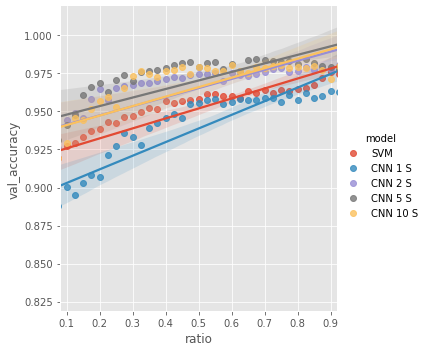

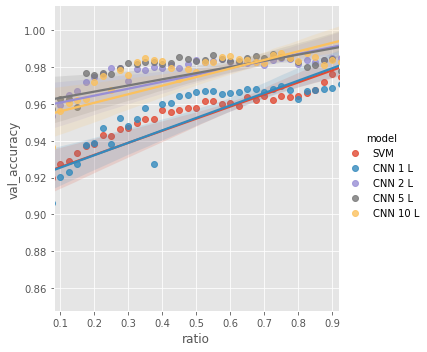

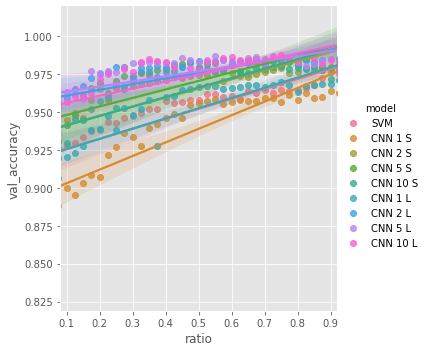

In [21]:
plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'S')
)))
plot_3a(pd.concat((
    results_3a_svm,
    select_size(results_3a_cnn, 'L')
)))
plot_3a(pd.concat((
    results_3a_svm,
    results_3a_cnn,
)))

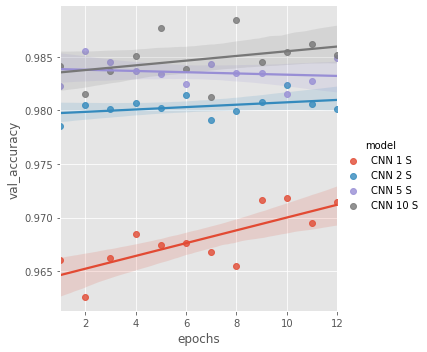

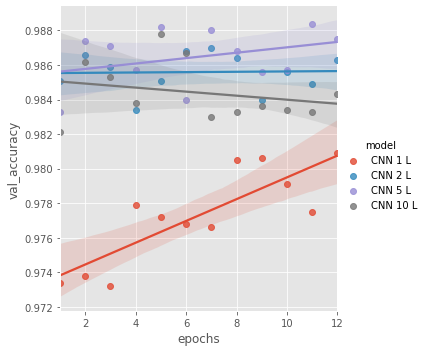

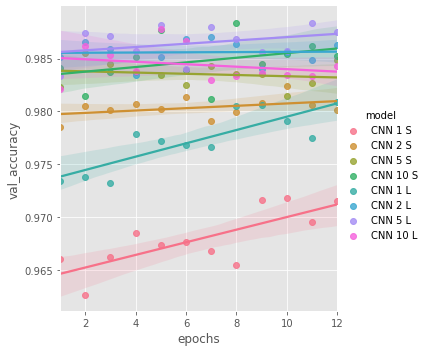

In [22]:
plot_3b(select_size(results_3b_cnn, 'S'))
plot_3b(select_size(results_3b_cnn, 'L'))
plot_3b(results_3b_cnn)